# Chapter - 5 : Probability



Frequentism - probability defined in terms of frequencies.

Bayesianism - probability is the degree of belief that an event will occur.

Rules of Probability
P(A and B) = P(A).P(B), where A and B are independent.
P(A|B) = P(A and B) / P(B), where A and B are not independent.

In [36]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from scipy.stats import norm
from scipy.special import comb
import math


1: If I roll 2 dice and get 8, what is the chance that one of the dice is 6?

(2,6), (3,5), (4,4), (5,3), (6,2) are the only ways of getting an 8. Of these, there are 2 cases where 1 dice has a 6. Thus the answer is 2/5 = 0.4

2: If I roll 100 die, what is the chance of getting all sixes?

Chance of getting 6 on 1 die is 1/6. Since the dice throws are mutually independent events, it is (1/6)\*\*100, ie, 1.530646707486498e-78.

3: If a family has 2 children, what is the chance that they will be both girls?

Family with 2 children can have one of (B,B), (B,G), (G,G), so its 0.33.

4: If a family has 2 children and we know at least one of them is a girl, what is the chance that they have 2 girls?

They can have (B,G) or (G,G), so its 0.5.

5: If a family has 2 children and we know the older one is a girl, what is the chance they have 2 girls?

Same as above.

6: If a family has 2 children and we know that at least one of them is a girl named Florida, what is the chance they have 2 girls?

Same as above.



## Monty Hall Problem

The question is, should you “stick” or “switch” or does it make no difference?

* The key is to realize that there are three possible scenarios: the car is behind
  Door A, B or C. Since the prizes are arranged at random, the probability of
  each scenario is 1/3.
* If your strategy is to stick with Door A, then you will win only in Scenario 
  A, which has probability 1/3.
* If your strategy is to switch, you will win in either Scenario B or Scenario C,
  so the total probability of winning is 2/3.

In [7]:
#simulates the Monty Hall problem

nbr_games = 1
nbr_wins_if_stick = 0
nbr_wins_if_switch = 0
for i in range(nbr_games):
    # door with the car behind it
    door_with_prize = np.random.randint(3)
    # make first guess
    first_guess = np.random.randint(3)
    # monty opens one of the "other" doors
    doors_available = [x for x in [0, 1, 2] if x != door_with_prize
                                            and x != first_guess]
    door_opened = doors_available[np.random.randint(len(doors_available))]
    second_guess = [x for x in [0, 1, 2] if x != door_opened
                                         and x != first_guess][0]

    print(first_guess)
    if door_with_prize == first_guess:
        nbr_wins_if_stick += 1
    if door_with_prize == second_guess:
        nbr_wins_if_switch += 1
print("Probability of winning if you stick: %.3f" % (nbr_wins_if_stick / nbr_games))
print("Probability of winning if you switch: %.3f" % (nbr_wins_if_switch / nbr_games))

2
1
0
Probability of winning if you stick: 0.000
Probability of winning if you switch: 1.000


In [4]:
#I t is important to realize that by deciding which door to open, Monty is giving you information. 
# Simulate the situation where this is not the case by making Monty open door B or C at random. 
# If he opens the door with the car, the game is over and you cannot decide whether to stick or switch.

nbr_games = 1000
nbr_wins_if_stick = 0
nbr_wins_if_switch = 0
for i in range(nbr_games):
    # door with the car behind it
    door_with_prize = np.random.randint(3)
    # make first guess
    first_guess = np.random.randint(3)
    # monty opens one of the "other" doors
    doors_available = [x for x in [0, 1, 2] if x != first_guess]
    door_opened = doors_available[np.random.randint(len(doors_available))]
    if door_opened == door_with_prize:
        continue
    second_guess = [x for x in [0, 1, 2] if x != door_opened
                                         and x != first_guess][0]
    if door_with_prize == first_guess:
        nbr_wins_if_stick += 1
    if door_with_prize == second_guess:
        nbr_wins_if_switch += 1
print("Probability of winning if you stick: %.3f" % (nbr_wins_if_stick / nbr_games))
print("Probability of winning if you switch: %.3f" % (nbr_wins_if_switch / nbr_games))

Probability of winning if you stick: 0.345
Probability of winning if you switch: 0.334


## Poincare


simulates a baker who chooses n loaves 
from a distribution with mean 950 g and standard deviation 50 g, and gives
the heaviest one to Poincaré. What value of n yields a distribution with
mean 1000 g? What is the standard deviation?


Poincare's loaves: mean = 998.993, sd = 34.088


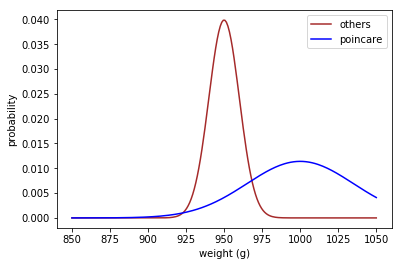

In [23]:
nbr_days = 365
n = 4
ploaf = np.zeros(nbr_days)
for day in range(nbr_days):
    loaf_wgts = 950 + 50 * np.random.randn(n)
    ploaf[day] = np.max(loaf_wgts)
print("Poincare's loaves: mean = %.3f, sd = %.3f" % (np.mean(ploaf), np.std(ploaf)))

xs = np.linspace(950-100, 950+100, 200)
loaf_ys = norm.pdf(xs, 950, 10)
ploaf_ys = norm.pdf(xs, 1000, 35)
plt.plot(xs, loaf_ys, color="brown", label="others")
plt.plot(xs, ploaf_ys, color="blue", label="poincare")
plt.xlabel("weight (g)")
plt.ylabel("probability")
plt.legend(loc="best")

In [24]:
nbr_obs = 1000
nbr_woman_taller = 0
men_heights = np.random.normal(loc=178, scale=59.4, size=nbr_obs)
women_heights = np.random.normal(loc=163, scale=52.8, size=nbr_obs)
for i in range(nbr_obs):
    nbr_woman_taller += 1 if women_heights[i] > men_heights[i] else 0
print("Probability of woman being taller: %.3f" % (nbr_woman_taller / nbr_obs))

Probability of woman being taller: 0.428


### coefficient of variance

To compare variability between groups, it is useful to compute the coefficient of variation,
which is the standard deviation as a fraction of the mean, σ/µ

In [64]:
print("variability of men height is: %.3f" %(math.sqrt(59.4)/178))
print("variability of women height is: %.3f" %(math.sqrt(52.8)/163))

variability of men height is: 0.043
variability of women height is: 0.045


### Mutually Exclusive Events

    P(A|B) = P(B|A) = 0
    P(A or B) = P(A) + P(B)              if A and B are mutually exclusive
    P(A or B) = P(A) + P(B) - P(A and B) in general

__Exercise 5.8:__ If I roll 2 dice, what is the chance of rolling at least one six?

Rolling at least 1 six = First dice roll 6 + Second dice roll 6 + Both dice roll 6 = (1/6)+(1/6)+(1/36) = 0.36.

__Exercise 5.9:__ What is the general formula for probability of A or B but not both?

    P(A or B) = P(A) + P(B) - P(A and B)
    

### Binomial Distribution

Chance of getting exactly k successes from n trials, given p is the probability of success.

$$PMF(k) = \binom{n}{k}p^{k}(1-p)^{n-k}$$

$$\binom{n}{k} = \frac{n!}{k!(n-k)!}$$



In [38]:
p = comb(100, 50) * math.pow(0.5, 50) * math.pow(0.5, 50)
print("probability of exactly 50 heads in 100 tosses: %.3f" % (p))

probability of exactly 50 heads in 100 tosses: 0.080
[0.99684605 0.44972515 0.34293581 0.25313308 0.79362727 0.16194424
 0.23395333 0.18288986 0.65283775 0.11633857 0.67277061 0.45912765
 0.18392654 0.01156531 0.43657096]


## Streaks and Hotspots


In [46]:
'''If there are 10 players in a basketball game and each one takes
15 shots during the course of the game, and each shot has a 50% probability
of going in, what is the probability that you will see, in a given game, at
least one player who hits 10 shots in a row? If you watch a season of 82
games, what are the chances you will see at least one streak of 10 hits or
misses?'''

def step(x, t):
    return 1 if x > t else 0

nbr_sims = 1000
nbr_players = 10
nbr_succ = 0
for g in range(nbr_sims):
    for p in range(nbr_players):
        nbr_streaks = 0
        shots = [step(x, 0.5) for x in np.random.random(15).tolist()]
        for i in range(len(shots)-10):
            window = shots[i:i+10]
            if sum(window) == 10:
                nbr_streaks += 1
    # we saw at least 1 streak (or not) in this game
    nbr_succ += 1 if nbr_streaks > 0 else 0
print("chance of seeing at least 1 streak per game: %.3f" % (nbr_succ / nbr_sims))

nbr_games = 82
nbr_succ = 0
for s in range(nbr_sims):
    for g in range(nbr_games):
        nbr_streaks = 0
        for p in range(nbr_players):
            shots = [step(x, 0.5) for x in np.random.random(15).tolist()]
            for i in range(len(shots)-10):
                window = shots[i:i+10]
                if sum(window) == 10 or sum(window) == 0:
                    nbr_streaks += 1
    nbr_succ += 1 if nbr_streaks > 0 else 0
print("chance of seeing at least 1 streak per season: %.3f" % (nbr_succ / nbr_sims))









chance of seeing at least 1 streak per game: 0.003
chance of seeing at least 1 streak per season: 0.056


In [49]:
'''Use a Monte Carlo simulation to estimate the probability that any player in
major league baseball will have a hitting streak of 57 or more games in the
next century'''

nbr_sims = 1000
nbr_years = 100 # next century
nbr_games_per_season = 162 
nbr_succ = 0
for sim in range(nbr_sims):
    for i in range(nbr_years):
        nbr_streaks = 0
        hits = [step(x, 0.5) for x in np.random.random(nbr_games_per_season).tolist()]
        for j in range(len(hits)-57):
            window = hits[j:j+57]
            if sum(window) == 57:
                nbr_streaks += 1
    if nbr_streaks > 0:
        nbr_succ += 1
print("chance of another hitting streak: %.7f" % (nbr_succ / nbr_sims))

chance of another hitting streak: 0.0000000



### Bayes Theorem

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

Here P(A) is the prior, P(A|B) is the posterior, P(B|A) is the likelihood, and P(B) is the normalizing constant.

Bayes’s theorem is often interpreted as a statement about how a body of evidence, E, affects the probability of a hypothesis, H.



In [50]:
'''Takes the actual rate of drug use, and the
sensitivity and specificity of the test, and uses Bayes’s theorem to compute
P(D|E).'''

# p(drug use)
# p(positive result | drug use)
# p(negative result | -drug use)

def compute_drug_use_given_positive_test(p_drug_use, sensitivity, specificity):   
    norm = (p_drug_use * sensitivity) + ((1 - p_drug_use)*(1 - specificity))
    return (p_drug_use * sensitivity) / norm

print(compute_drug_use_given_positive_test(0.05, 0.6, 0.99))
print(compute_drug_use_given_positive_test(0.01, 0.6, 0.99))

0.7594936708860758
0.3773584905660375


Suppose there are two full bowls of cookies. Bowl 1 has 10
chocolate chip and 30 plain cookies, while Bowl 2 has 20 of each.
Our friend Fred picks a bowl at random, and then picks a cookie
at random. The cookie turns out to be a plain one. How probable
is it that Fred picked it out of Bowl 1?

In [54]:

p_bowl1 = 0.5
p_bowl2 = 0.5
p_plain_given_bowl1 = 30 / (10 + 30)
p_plain_given_bowl2 = 20 / (20 + 20)
p_bowl1_given_plain = p_plain_given_bowl1 * p_bowl1
p_bowl1_given_plain /= (p_plain_given_bowl1 * p_bowl1) + (p_plain_given_bowl2 * p_bowl2)
print(p_bowl1_given_plain)

0.6


The blue M&M was introduced in 1995. Before then, the color
mix in a bag of plain M&Ms was (30% Brown, 20% Yellow, 20% Red, 10%
Green, 10% Orange, 10% Tan). Afterward it was (24% Blue , 20% Green,
16% Orange, 14% Yellow, 13% Red, 13% Brown).


A friend of mine has two bags of M&Ms, and he tells me that one is from
1994 and one from 1996. He won’t tell me which is which, but he gives
me one M&M from each bag. One is yellow and one is green. What is the
probability that the yellow M&M came from the 1994 bag?

In [55]:
# h1 = bag 1 is from 1994 and bag 2 is from 1996
# h2 = bag 1 is from 1996 and bag 2 is from 1994
# e = yellow and green M&M
p_h1 = 0.5
p_h2 = 0.5
p_e_given_h1 = 0.2 * 0.2  # P(y from 1994 bag) * P(g from 1996 bag)
p_e_given_h2 = 0.1 * 0.14 # P(y from 1996 bag) * P(g from 1994 bag)
p_h1_given_e = p_e_given_h1 * p_h1
p_h1_given_e /= ((p_e_given_h1 * p_h1) + (p_e_given_h2 * p_h2))
print(p_h1_given_e)



0.7407407407407408


Elvis Presley had a twin brother who died at birth. According to the
Wikipedia article on twins:
“Twins are estimated to be approximately 1.9% of the world population,
with monozygotic twins making up 0.2% of the total—
and 8% of all twins.”

What is the probability that Elvis was an identical twin?

In [56]:
# h1 = elvis had identical twin
# h2 = elvis had fraternal twin
# e = brother was male
p_h1 = 0.08
p_h2 = 1 - p_h1
p_e_given_h1 = 1.0     # identical twins have same gender
p_e_given_h2 = 0.5     # fraternal twins can have either gender
p_h1_given_e = p_e_given_h1 * p_h1
p_h1_given_e /= ((p_e_given_h1 * p_h1) + (p_e_given_h2 * p_h2))
print(p_h1_given_e)

0.14814814814814814
